**PENJELASAN TIAP KOLOM**

1	months_as_customer:	Lama pelanggan menjadi nasabah (dalam bulan). Bisa menunjukkan loyalitas.

2	age:	Usia tertanggung. Mungkin memengaruhi risiko klaim.

3	policy_number: Nomor polis unik. Tidak mengandung informasi prediktif langsung.

4	policy_bind_date: Tanggal polis dimulai atau diaktifkan.
5	policy_state:	Negara bagian tempat polis diterbitkan.

6	policy_csl:	CSL: Combined Single Limit, batas klaim untuk cedera dan kerusakan properti.

7	policy_deductable:	Jumlah yang harus dibayar nasabah sebelum klaim dibayarkan oleh perusahaan.

8	policy_annual_premium:	Premi tahunan yang dibayar nasabah. Bisa terkait besar kecilnya klaim.

9	umbrella_limit:	Limit tambahan dari polis utama. Nilai lebih tinggi = proteksi lebih besar.

10	insured_zip:	Kode pos tertanggung. Bisa diasosiasikan dengan lokasi risiko.
11	insured_sex:	Jenis kelamin tertanggung.

12	insured_education_level:	Tingkat pendidikan tertanggung. Bisa berhubungan dengan karakteristik risiko.

13	insured_occupation:	Pekerjaan tertanggung. Profesi tertentu mungkin lebih berisiko.

14	insured_hobbies:	Hobi tertanggung. Bisa digunakan untuk analisis risiko personal.

15	insured_relationship:	Status hubungan antara tertanggung dan pemegang polis.

16	capital-gains:	Keuntungan modal dari sumber lain.

17	capital-loss:	Kerugian modal dari sumber lain.

18	incident_date:	Tanggal kejadian insiden.

19	incident_type: Jenis kejadian: misalnya Theft, Collision, dll.

20	collision_type:	Jenis tabrakan (Front, Side, Rear). Bisa menunjukkan jenis kerusakan.

21	authorities_contacted:	Apakah pihak berwenang (polisi/dll) dihubungi saat insiden. (ada missing)

22	incident_state:	Lokasi negara bagian tempat insiden terjadi.

23	incident_city:	Kota tempat insiden terjadi.

24	incident_location:	Alamat spesifik lokasi kejadian.

25	incident_hour_of_the_day:	Jam terjadinya insiden (0–23).

26	number_of_vehicles_involved:	Jumlah kendaraan yang terlibat dalam insiden.

27	property_damage:	Apakah properti lain rusak dalam insiden (Yes/No/?).

28	bodily_injuries:	Jumlah orang yang mengalami cedera tubuh.

29	witnesses:	Jumlah saksi mata. Bisa meningkatkan validitas klaim.

30	police_report_available:	Apakah laporan polisi tersedia (Yes/No/?).

31	total_claim_amount:	Total nilai klaim (gabungan seluruh komponen).

32	injury_claim:	Klaim untuk cedera tubuh. Subkomponen dari total_claim_amount.

33	property_claim:	Klaim untuk kerusakan properti.

34	vehicle_claim:	Klaim untuk kendaraan.

35	auto_make:	Merek mobil yang diasuransikan.

36	auto_model:	Model mobil.

37	auto_year:	Tahun pembuatan mobil.

38	fraud_reported:	Label target: Apakah klaim ini fraud? (Y/N) → variabel dependen


In [7]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import gdown
import warnings
warnings.filterwarnings("ignore")

file_id = '1obssJCyOTyjzorhykQ1pisGwJIv8BFVI'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'D:\Kuliah\Semester 7\TA\Fraud_Insured_Automobile_Detection\data\claim_insurance_fraud.csv', quiet=False)

df = pd.read_csv('D:\Kuliah\Semester 7\TA\Fraud_Insured_Automobile_Detection\data\claim_insurance_fraud.csv')
df.head()

<>:12: SyntaxWarning: invalid escape sequence '\K'
<>:14: SyntaxWarning: invalid escape sequence '\K'
<>:12: SyntaxWarning: invalid escape sequence '\K'
<>:14: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Wanda Azizah\AppData\Local\Temp\ipykernel_3804\2922786181.py:12: SyntaxWarning: invalid escape sequence '\K'
  gdown.download(url, 'D:\Kuliah\Semester 7\TA\Fraud_Insured_Automobile_Detection\data\claim_insurance_fraud.csv', quiet=False)
C:\Users\Wanda Azizah\AppData\Local\Temp\ipykernel_3804\2922786181.py:14: SyntaxWarning: invalid escape sequence '\K'
  df = pd.read_csv('D:\Kuliah\Semester 7\TA\Fraud_Insured_Automobile_Detection\data\claim_insurance_fraud.csv')
Downloading...
From: https://drive.google.com/uc?id=1obssJCyOTyjzorhykQ1pisGwJIv8BFVI
To: D:\Kuliah\Semester 7\TA\Fraud_Insured_Automobile_Detection\data\claim_insurance_fraud.csv
100%|██████████| 266k/266k [00:00<00:00, 966kB/s]


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
df.shape

(1000, 39)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


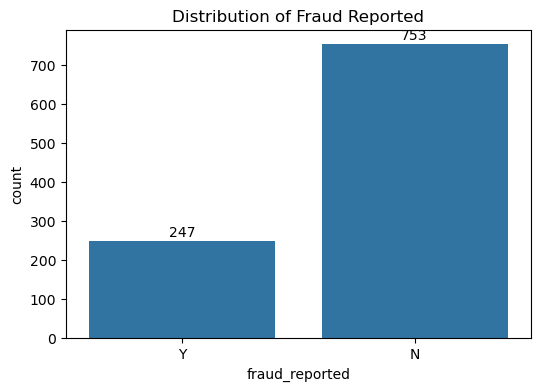

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='fraud_reported', data=df)

for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()),
            ha='center', va='bottom')

plt.title("Distribution of Fraud Reported")
plt.show()

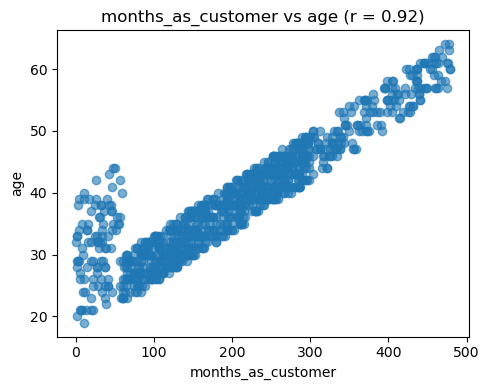

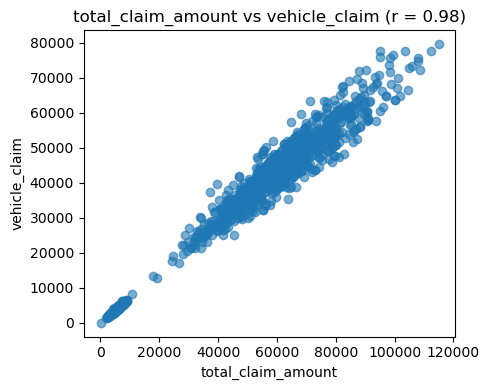

In [13]:
# Scatter ploy
target_col = "fraud_reported"
df_num = df.drop(columns=[target_col], errors="ignore") \
           .select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = df_num.corr(method="pearson")

# Threshold multikolinearitas
threshold = 0.9

# Ambil pasangan fitur unik (upper triangle)
high_mc = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_mc.columns = ["feature_1", "feature_2", "pearson_r"]

# Filter multikolinearitas tinggi
high_mc = high_mc[high_mc["pearson_r"].abs() > threshold]

high_mc
for _, row in high_mc.iterrows():
    f1, f2, r = row["feature_1"], row["feature_2"], row["pearson_r"]

    plt.figure(figsize=(5, 4))
    plt.scatter(df_num[f1], df_num[f2], alpha=0.6)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f"{f1} vs {f2} (r = {r:.2f})")
    plt.tight_layout()
    plt.show()

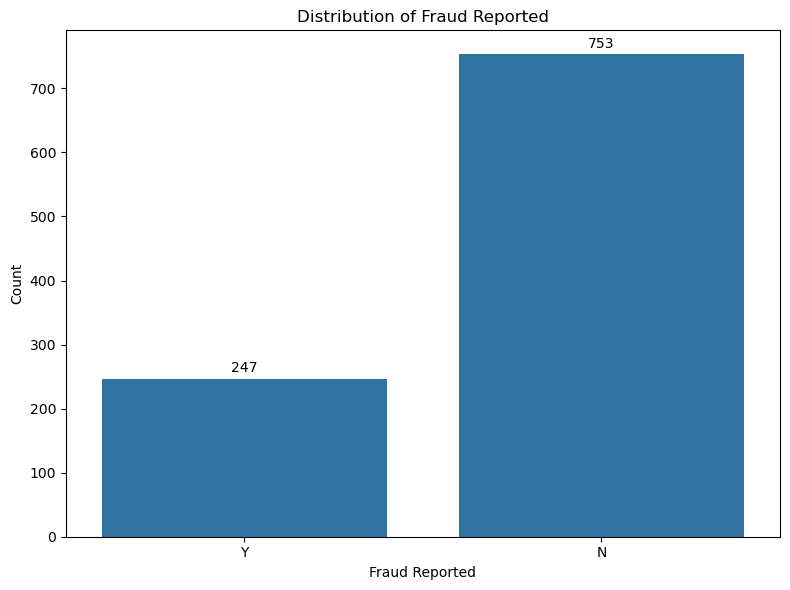

In [14]:
# distribusi fitur target

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraud_reported', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{height:.0f}', ha='center', va='bottom')

plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

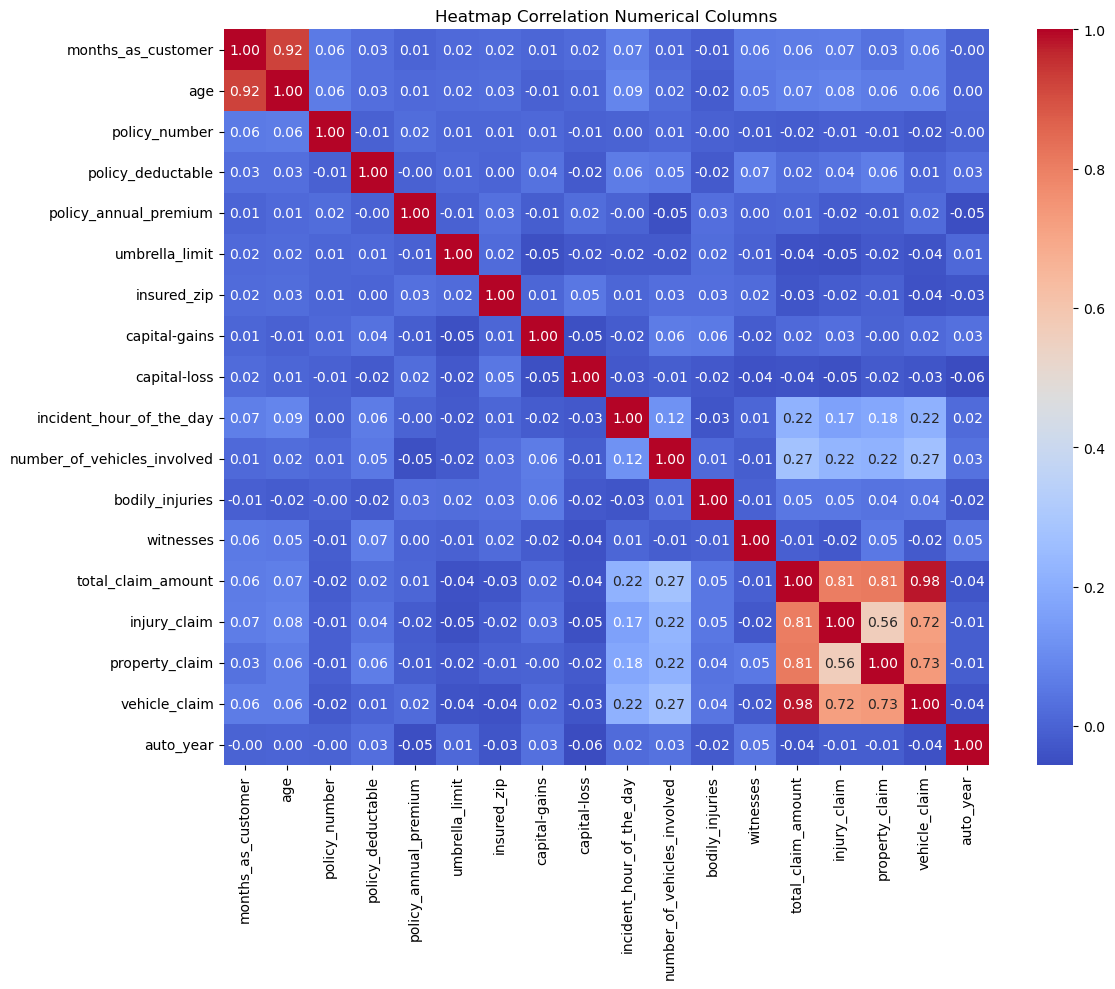

In [15]:
# heatmap untuk numerikal kolom nya

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
df_numerical = df[numerical_cols]

plt.figure(figsize=(12, 10))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Numerical Columns')
plt.tight_layout()
plt.show()

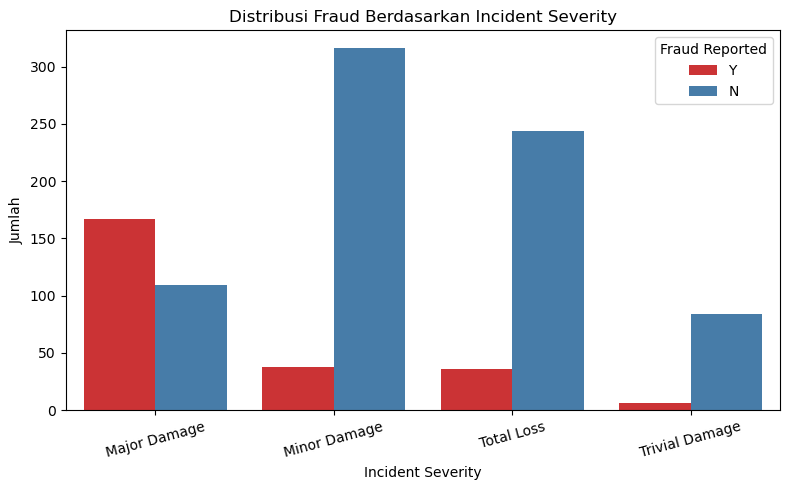

In [16]:
# unstacked bar chart untuk distribusi fraud berdasarkan incident severity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='incident_severity', hue='fraud_reported', palette='Set1')
plt.title('Distribusi Fraud Berdasarkan Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Jumlah')
plt.legend(title='Fraud Reported')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

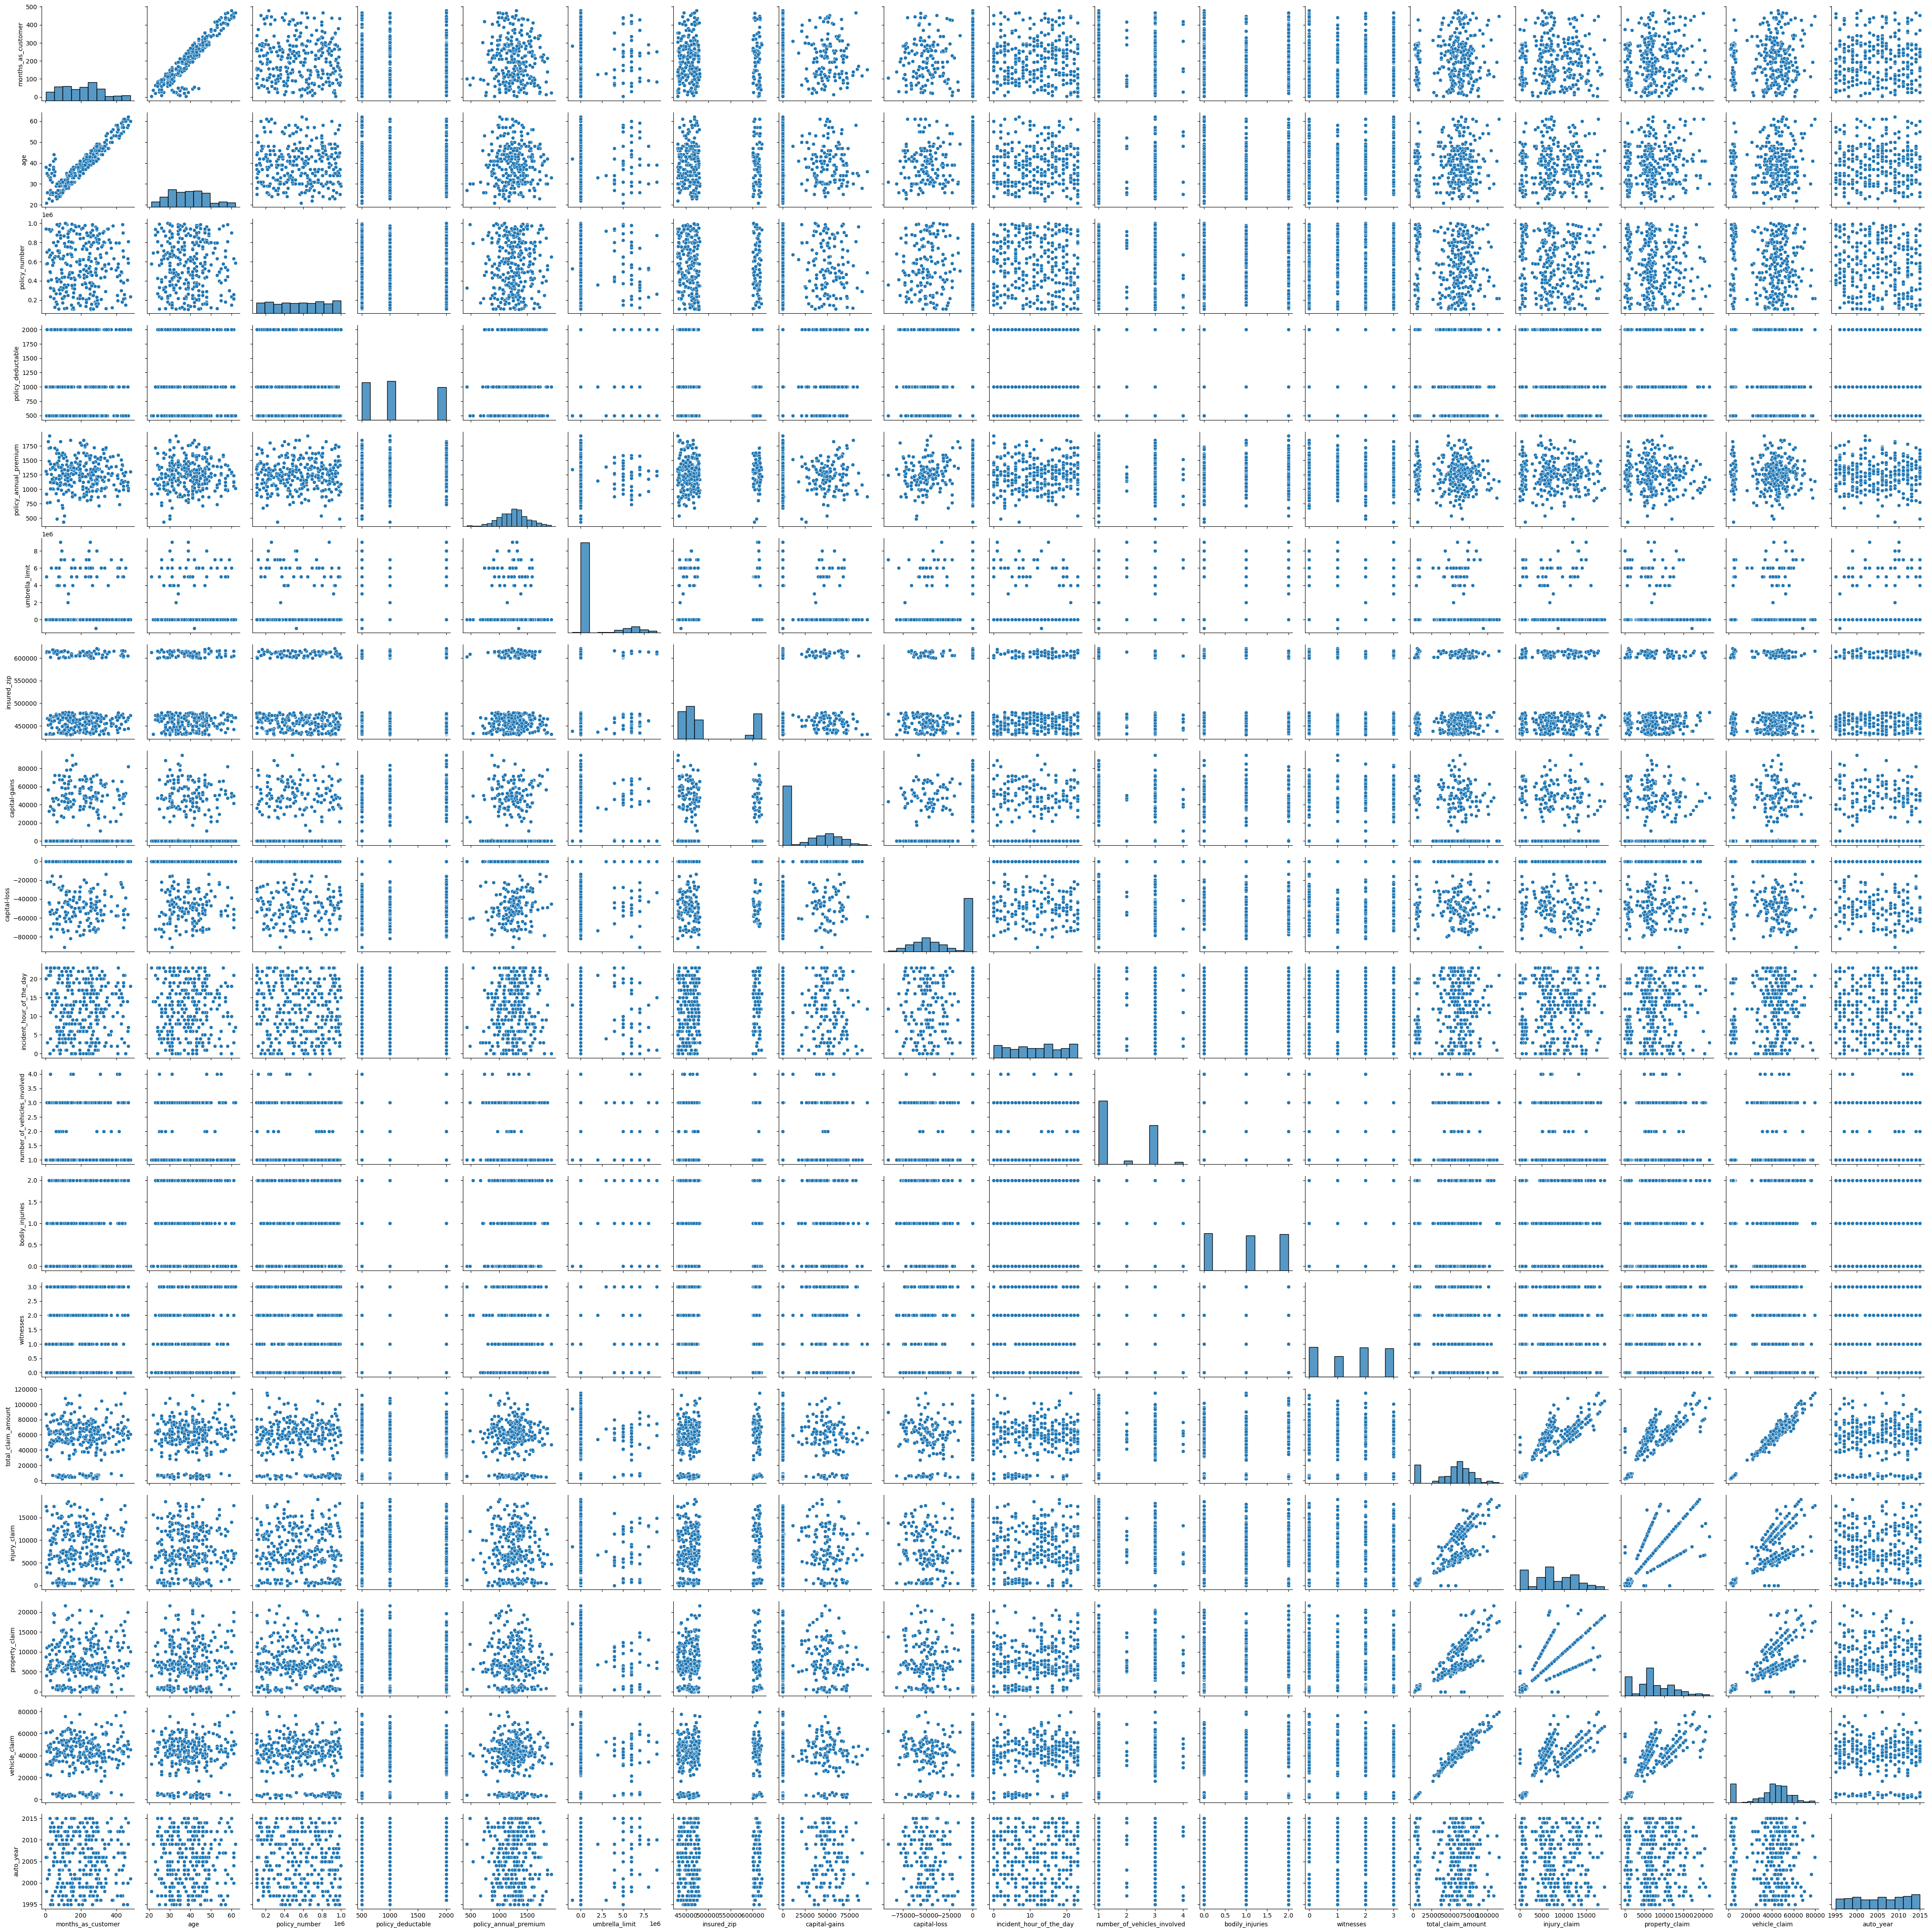

In [19]:
sns.pairplot(df_numerical.sample(300))
plt.show()

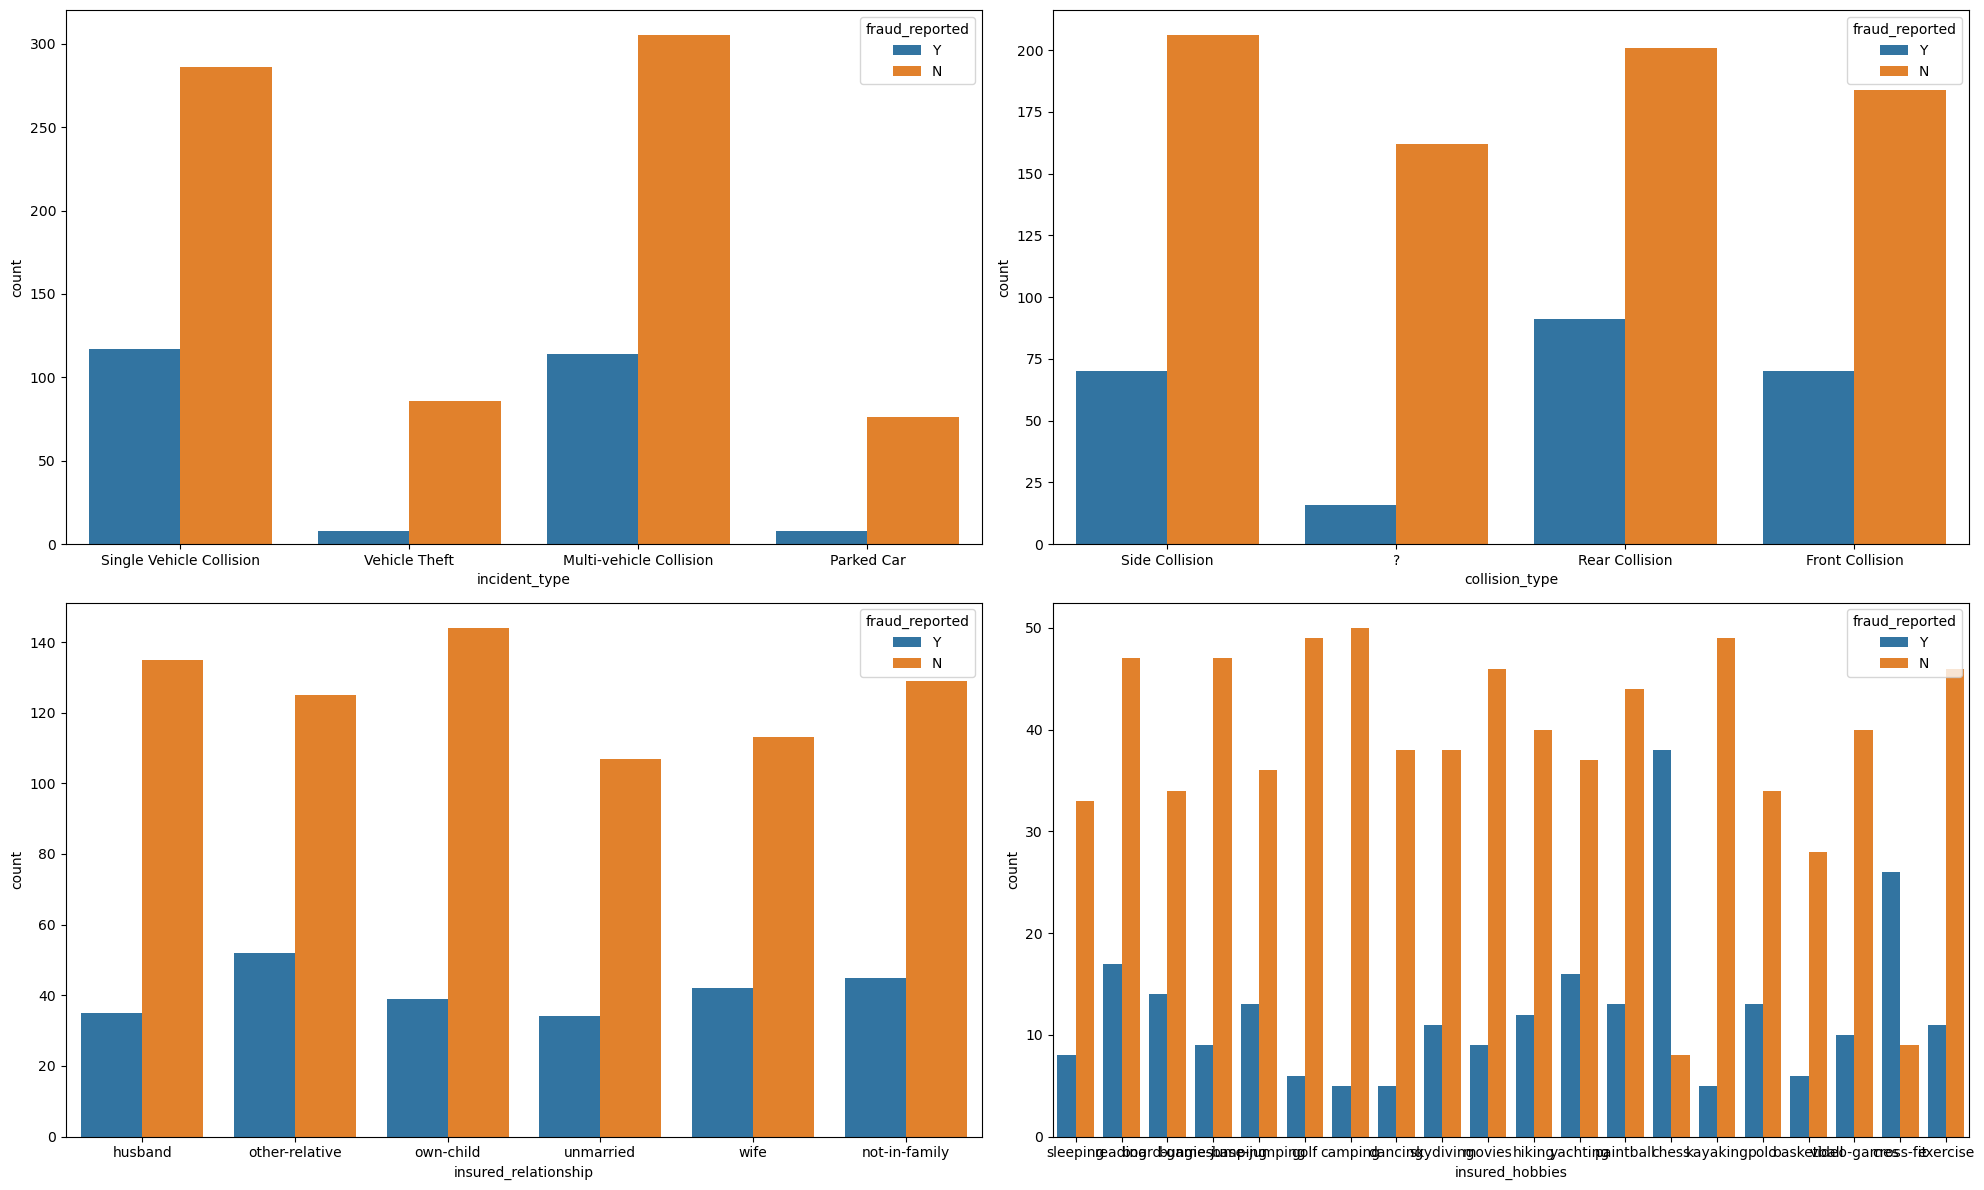

In [20]:
fig, ax = plt.subplots(2,2, figsize=(20,12))

sns.countplot(x='incident_type', hue='fraud_reported', data=df, ax=ax[0,0])
sns.countplot(x='collision_type', hue='fraud_reported', data=df, ax=ax[0,1])
sns.countplot(x='insured_relationship', hue='fraud_reported', data=df, ax=ax[1,0])
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=df, ax=ax[1,1])

plt.tight_layout()
plt.show()